# LSHTM Reff comparisons

Here I compare the LSHTM Reff estimates produced by Price et al at different time points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-poster')
from datetime import datetime as dt
from Reff_functions import *
from Reff_constants import *

In [4]:
df_R_old = read_in_Reff()
    
df_L_R = read_in_LSHTM()
df_cases = read_in_cases(case_file_date='31Jul')

In [5]:
df_L_R

,Unnamed: 0,type,date,bottom,top,lower,upper,median,mean,std,prob_control,mean_window,sd_window,confidence,date_onset,state,date_of_analysis
0,0,nowcast,2020-02-14,0.153051,2.334309,0.153051,0.404229,0.387671,0.974066,1.300986,0.700000,3.000000,1.025978,1.000000,2020-02-19,WA,2020-07-27
1,1,nowcast,2020-02-15,0.039381,2.095030,0.010038,0.458491,0.448248,0.696445,0.680216,0.733333,4.000000,1.660910,1.000000,2020-02-20,WA,2020-07-27
2,2,nowcast,2020-02-16,0.059741,2.203382,0.398748,1.021683,0.667627,0.795015,0.687228,0.733333,4.000000,1.660910,1.000000,2020-02-21,WA,2020-07-27
3,3,nowcast,2020-02-17,0.062429,3.123954,0.062429,0.741194,0.704504,1.235300,1.412852,0.600000,3.833333,1.355049,1.000000,2020-02-22,WA,2020-07-27
4,4,nowcast,2020-02-18,0.089700,4.741885,0.156969,1.420340,1.323398,1.959231,2.030840,0.412500,3.875000,1.545717,1.000000,2020-02-23,WA,2020-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,2254,nowcast,2020-07-03,0.335155,1.032422,0.484713,0.752499,0.641686,0.673346,0.222352,0.913413,1.947948,1.541398,0.777736,2020-07-08,NSW,2020-07-16
3286,2255,nowcast,2020-07-04,0.377372,1.132724,0.526637,0.821673,0.720021,0.753190,0.239839,0.850050,1.947948,1.541398,0.721748,2020-07-09,NSW,2020-07-16
3287,2256,nowcast,2020-07-05,0.434843,1.292793,0.585349,0.926001,0.829955,0.871006,0.276024,0.716416,1.947948,1.541398,0.653490,2020-07-10,NSW,2020-07-16
3288,2257,nowcast,2020-07-06,0.526545,1.578843,0.691363,1.096180,0.985870,1.041906,0.339545,0.517618,1.947948,1.541398,0.571331,2020-07-11,NSW,2020-07-16


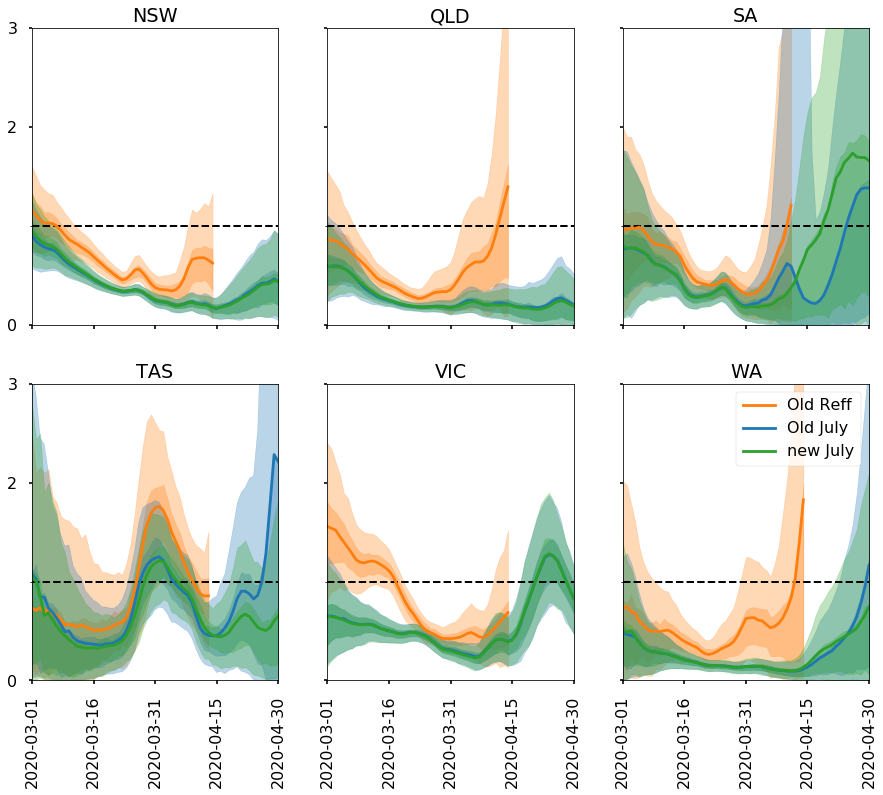

In [6]:
#plot each estimate
fig, ax = plt.subplots(figsize=(15,12), ncols=3,nrows=2, sharex=True, sharey=True)

states = [initial[1] for initial in sorted(list(states_initials.items()))]

states.remove('NT')
states.remove('ACT')
date_filter = pd.date_range(start='2020-03-01',end='2020-04-30')
    
for i, state in enumerate(states):
    
    row, col = i//3, i%3
    
    #filters
    df_state = df_R_old.loc[(df_R_old.state==state) & (df_R_old.date.isin(date_filter))]
    
    df_april = df_L_R.loc[(df_L_R.date_of_analysis=='2020-07-16')&(df_L_R.state==state)]
    df_april = df_april.loc[df_april.date.isin(date_filter)]
    
    df_june = df_L_R.loc[(df_L_R.date_of_analysis=='2020-07-27')&(df_L_R.state==state)]
    df_june = df_june.loc[(df_june.date.isin(date_filter))]
    
    plot_dfs ={
        'Old Reff':df_state,
        'Old July': df_april,
        'new July':df_june,
    }
    colors = {
        'Old Reff':'C1',
        'Old July': 'C0',
        'new July':'C2',
        
    }
    
    for label, df in plot_dfs.items():
        #plot old estimate
        ax[row,col].plot(df.date, df['median'], label=label,color=colors[label])
        ax[row,col].fill_between(df.date, df['bottom'], df['top'],color=colors[label], alpha=0.3)
        ax[row,col].fill_between(df.date, df['lower'], df['upper'],color=colors[label], alpha=0.3)


    
    
    #formatting
    ax[row,col].set_title(state)

    
    #grid line at R_eff =1
    ax[i//3,i%3].set_yticks([1],minor=True,)
    ax[i//3,i%3].set_yticks([0,2,3],minor=False)
    ax[i//3,i%3].set_yticklabels([0,2,3],minor=False)
    ax[i//3,i%3].yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
    ax[i//3,i%3].set_ylim((0,3))
    ax[row,col].xaxis.set_major_locator(plt.MaxNLocator(4))
    if i//3==1:
        ax[i//3,i%3].tick_params(axis='x',rotation=90)
        ax[row,col].set_xlim((date_filter[0],date_filter[-1]))
    
plt.legend()
plt.show()

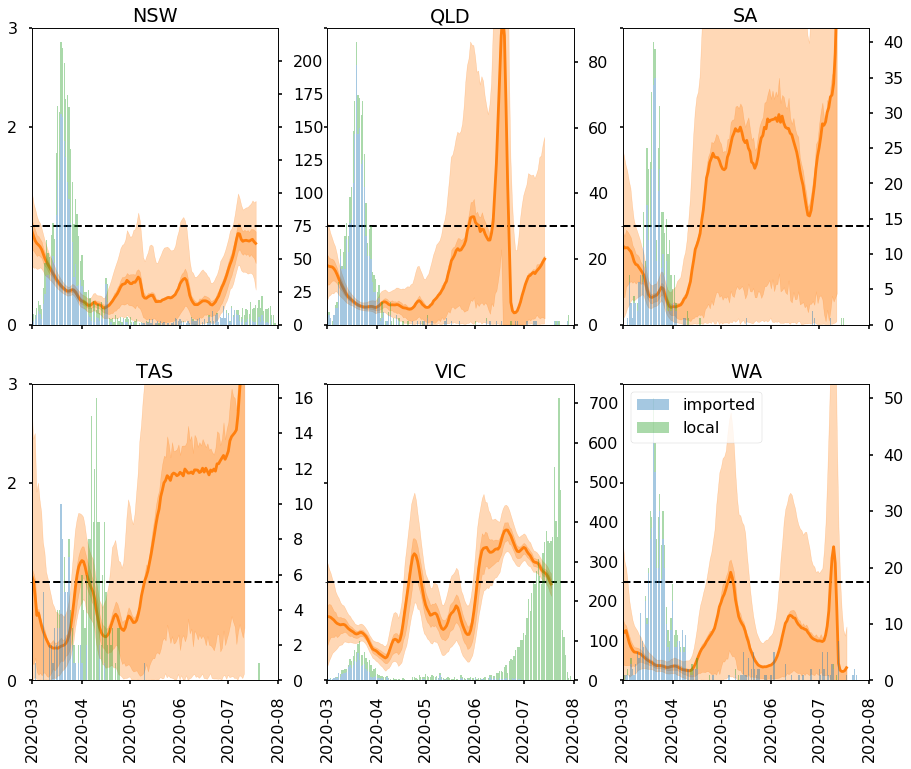

In [7]:
## plot cases over the top of Reff
fig, ax = plt.subplots(figsize=(15,12), ncols=3,nrows=2, sharex=True, sharey=True)

states = [initial[1] for initial in sorted(list(states_initials.items()))]

states.remove('NT')
states.remove('ACT')
date_filter = pd.date_range(start='2020-03-01',end='2020-08-01')
    
for i, state in enumerate(states):
    
    row, col = i//3, i%3
    
    #filters
    df_state = df_cases.loc[(state)]

    df_state = df_state.loc[date_filter[0]:date_filter[-1]]
    #print(df_state.index)
    #df_state.index = pd.DatetimeIndex(df_state.index)
    
    #fill missing dates
#
    #df_state.index = df_state.reindex(date_filter, fill_value=0)
    df_state= df_state.asfreq('D')
    df_june = df_L_R.loc[(df_L_R.date_of_analysis=='2020-07-27')&(df_L_R.state==state)]
    df = df_june.loc[(df_june.date.isin(date_filter))]
    

    #plot new estimate
    ax[row,col].plot(df.date, df['median'], label='June Reff',color='C1')
    ax[row,col].fill_between(df.date, df['bottom'], df['top'],color='C1', alpha=0.3)
    ax[row,col].fill_between(df.date, df['lower'], df['upper'],color='C1', alpha=0.3)
    ax2 = ax[row,col].twinx()
    ax2.bar(df_state.index, df_state.imported,color='C0',alpha=0.4, label='imported')
    ax2.bar(df_state.index, df_state.local,bottom=df_state.imported,color='C2',alpha=0.4, label='local')
    #formatting
    ax[row,col].set_title(state)

    
    #grid line at R_eff =1
    ax[i//3,i%3].set_yticks([1],minor=True,)
    ax[i//3,i%3].set_yticks([0,2,3],minor=False)
    ax[i//3,i%3].set_yticklabels([0,2,3],minor=False)
    ax[i//3,i%3].yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
    ax[i//3,i%3].set_ylim((0,3))
    
        
    if i//3==1:
        ax[i//3,i%3].tick_params(axis='x',rotation=90)
        ax[row,col].set_xlim((date_filter[0],date_filter[-1]))
plt.legend()
plt.show()

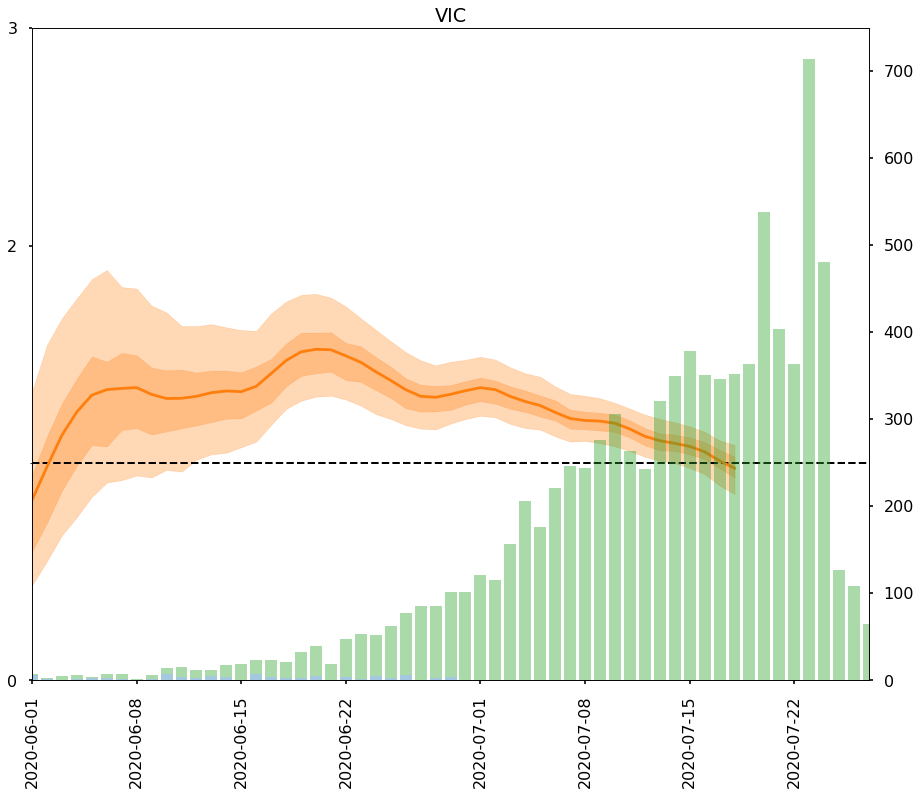

In [8]:
fig, ax = plt.subplots(figsize=(15,12))

date_filter = pd.date_range(start='2020-06-01',end='2020-07-27')
    
state = 'VIC'


#filters
df_state = df_cases.loc[(state)]

df_state = df_state.loc[date_filter[0]:date_filter[-1]]
#print(df_state.index)
#df_state.index = pd.DatetimeIndex(df_state.index)

#fill missing dates
#
#df_state.index = df_state.reindex(date_filter, fill_value=0)
df_state= df_state.asfreq('D')
df_june = df_L_R.loc[(df_L_R.date_of_analysis=='2020-07-27')&(df_L_R.state==state)]
df = df_june.loc[(df_june.date.isin(date_filter))]


#plot new estimate
ax.plot(df.date, df['median'], label='July Reff',color='C1')
ax.fill_between(df.date, df['bottom'], df['top'],color='C1', alpha=0.3)
ax.fill_between(df.date, df['lower'], df['upper'],color='C1', alpha=0.3)
ax2 = ax.twinx()
ax2.bar(df_state.index, df_state.imported,color='C0',alpha=0.4)
ax2.bar(df_state.index, df_state.local,bottom=df_state.imported,color='C2',alpha=0.4)
#formatting
ax.set_title(state)


#grid line at R_eff =1
ax.set_yticks([1],minor=True,)
ax.set_yticks([0,2,3],minor=False)
ax.set_yticklabels([0,2,3],minor=False)
ax.yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
ax.set_ylim((0,3))
    
        

ax.tick_params(axis='x',rotation=90)
ax.set_xlim((date_filter[0],date_filter[-1]))
    
plt.show()

# Time distributions


Generation time: 
Mean: 4.958145.2
Std: 3.150734.2
Symptom Onset: 
Mean: 3.974821.2
Median: 3.328656.2
Std: 2.830090.2
Difference 
Mean: 0.983324.2
Variance: 17.863536.2
The 40 pc quantile of the TG - TS is -0.00


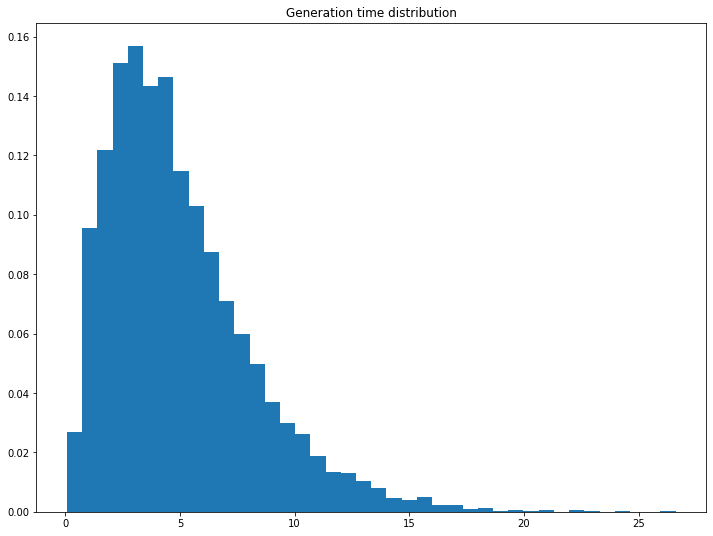

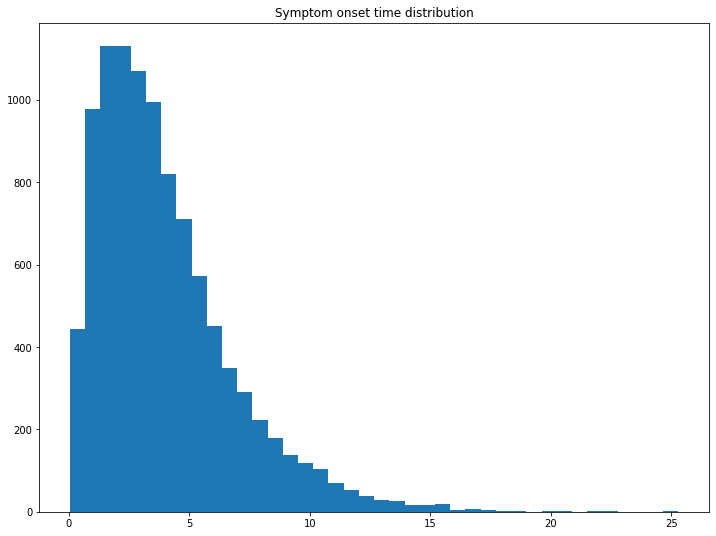

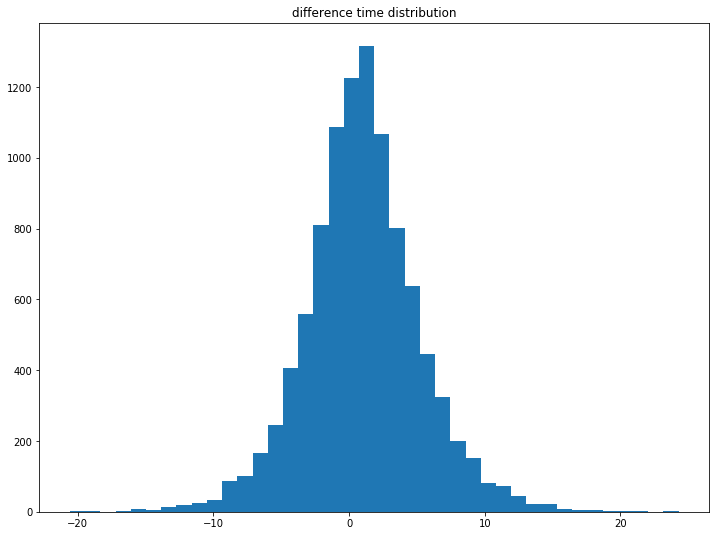

In [32]:
import numpy as np
import matplotlib.pyplot as plt

#Generation time distribution
fig,ax = plt.subplots(figsize=(12,9))
x = np.random.gamma(5/2, 2, size = 10000)
print("Generation time: \nMean: %f.2" %np.mean(x))
print("Std: %f.2" %np.std(x))
w = ax.hist(x,bins=40, density=True, range=)
ax.set_title("Generation time distribution")

#Symptom onset time distribution
fig,ax = plt.subplots(figsize=(12,9))
y =  np.random.gamma(4/2, 2, size = 10000)
print("Symptom Onset: \nMean: %f.2" %np.mean(y))
print("Median: %f.2" %np.median(y))
print("Std: %f.2" %np.std(y))
ax.hist(y,bins=40)
ax.set_title("Symptom onset time distribution")


#difference 
fig,ax = plt.subplots(figsize=(12,9))

print("Difference \nMean: %f.2" %np.mean(x-y))
print("Variance: %f.2" %np.var(x-y))
ax.hist(x-y,bins=40)
ax.set_title("difference time distribution")
print("The 40 pc quantile of the TG - TS is %.2f" % np.quantile(x-y,0.4))
plt.show()

In [36]:
w[0]

array([2.68201248e-02, 9.53771854e-02, 1.21895961e-01, 1.50976208e-01,
       1.56852528e-01, 1.43291790e-01, 1.46455962e-01, 1.14814242e-01,
       1.02910928e-01, 8.75420928e-02, 7.09678583e-02, 5.99685937e-02,
       4.97227033e-02, 3.70660152e-02, 2.99842968e-02, 2.62174254e-02,
       1.88343573e-02, 1.32593875e-02, 1.29580378e-02, 1.02458904e-02,
       8.13644236e-03, 4.67092061e-03, 4.06822118e-03, 4.82159547e-03,
       2.26012288e-03, 2.26012288e-03, 9.04049151e-04, 1.20539887e-03,
       1.50674858e-04, 4.52024575e-04, 1.50674858e-04, 4.52024575e-04,
       0.00000000e+00, 4.52024575e-04, 1.50674858e-04, 0.00000000e+00,
       3.01349717e-04, 0.00000000e+00, 0.00000000e+00, 1.50674858e-04])

## Reporting Delay distributions

In [52]:
#View NNDSS case delays

from datetime import timedelta
import glob

case_file_date="06Aug"
path = "../data/COVID-19 UoM "+case_file_date+"*.xlsx"

for file in glob.glob(path):
    df_NNDSS = pd.read_excel(file,
                   parse_dates=['SPECIMEN_DATE','NOTIFICATION_DATE','NOTIFICATION_RECEIVE_DATE','TRUE_ONSET_DATE'],
                   dtype= {'PLACE_OF_ACQUISITION':str})

df_NNDSS


,STATE,CONFIRMATION_STATUS,POSTCODE,TRUE_ONSET_DATE,SPECIMEN_DATE,NOTIFICATION_DATE,NOTIFICATION_RECEIVE_DATE,Diagnosis_Date,AGE_AT_ONSET,SEX,...,CV_ICU,CV_VENTILATED,OUTBREAK_REF,CASE_FOUND_BY,CV_SYMPTOMS,CV_OTHER_SYMPTOMS,CV_COMORBIDITIES,CV_OTHER_COMORBIDITIES,CV_GESTATION,CV_CLOSE_CONTACT
0,ACT,1,2601.0,2020-07-07,2020-07-08,2020-07-09,2020-07-09,2020-07-07,25.0,2,...,9.0,9.0,ACT0006,NaN,01|08,NaN,01,NaN,NaN,3.0
1,ACT,1,2914.0,2020-07-07,2020-07-08,2020-07-09,2020-07-09,2020-07-07,28.0,1,...,9.0,9.0,ACT0006,NaN,01|08,NaN,01,NaN,NaN,5.0
2,ACT,1,2601.0,2020-07-07,2020-07-07,2020-07-08,2020-07-08,2020-07-07,27.0,1,...,9.0,9.0,ACT0006,NaN,02|03|08|88,Mild skin allergy (detergent),01,NaN,NaN,3.0
3,ACT,1,2601.0,2020-07-04,2020-07-07,2020-07-08,2020-07-08,2020-07-04,26.0,2,...,9.0,9.0,ACT0006,NaN,01|02|03,NaN,01,NaN,NaN,9.0
4,ACT,1,2601.0,2020-07-03,2020-07-07,2020-07-08,2020-07-08,2020-07-03,26.0,1,...,9.0,9.0,ACT0006,NaN,02|03|08,NaN,01,NaN,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19802,WA,1,6156.0,2020-03-02,2020-03-07,2020-03-12,2020-03-10,2020-03-02,27.0,1,...,2.0,2.0,NaN,1.0,02|03|04,NaN,01,NaN,NaN,3.0
19803,WA,1,6069.0,2020-02-27,2020-02-27,NaT,2020-03-02,2020-02-27,79.0,2,...,2.0,2.0,111-2020-001,2.0,04,NaN,01,NaN,NaN,4.0
19804,WA,1,6069.0,2020-02-20,2020-02-22,2020-02-24,2020-02-24,2020-02-20,78.0,1,...,1.0,2.0,111-2020-001,1.0,01|02|15,NaN,06|12,NaN,NaN,4.0
19805,WA,1,6221.0,2020-02-17,2020-03-26,NaT,2020-03-28,2020-02-17,24.0,2,...,NaN,NaN,NaN,1.0,01|02|03|04|08|88,Loss of taste and smell,01,NaN,NaN,2.0


Gamma fit is: 
k: 1.77 
theta: 3.17 
mean: 5.46
 std: 4.01 
LogNormal fit is: 
 shape: 0.76 
scale: 4.03 
loc: 0.00
mean: 5.34
 std: 4.81 


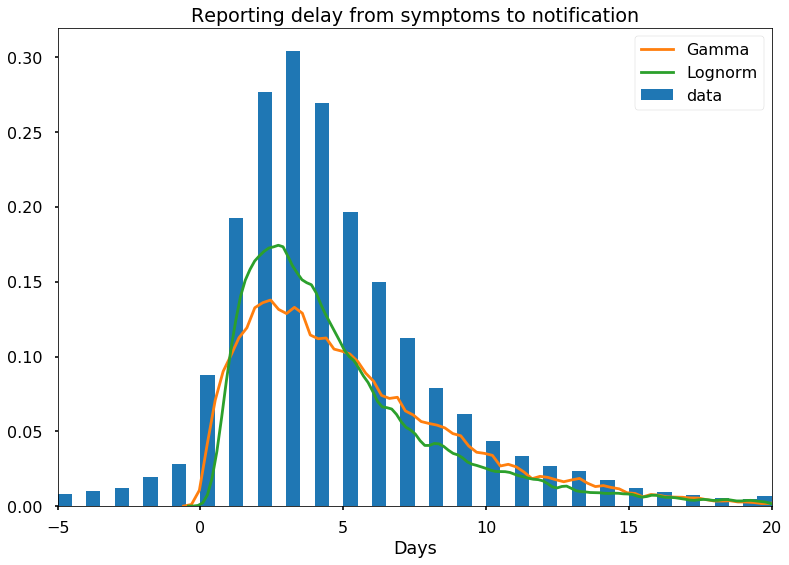

In [98]:
import scipy.stats as stats
import seaborn as sns

df_NNDSS['Report_delay'] = (df_NNDSS.NOTIFICATION_RECEIVE_DATE - df_NNDSS.TRUE_ONSET_DATE)
df_NNDSS['Report_delay'] = [day.days for day in df_NNDSS.Report_delay]

fig,ax = plt.subplots()

hist_bin_range = (-5,20)

ax.hist(df_NNDSS.Report_delay, bins =50, range=hist_bin_range, density = True,label="data")

fit_k, fit_loc, fit_theta = stats.gamma.fit(df_NNDSS.loc[df_NNDSS.Report_delay>0,'Report_delay'],
                                        floc = 0)

fit_shape, fit_loc, fit_scale = stats.lognorm.fit(df_NNDSS.loc[df_NNDSS.Report_delay>0,'Report_delay'],
                                                  floc=0)

fitted_delay = stats.gamma.rvs(fit_k,scale =fit_theta, loc=fit_loc,size=10000)
fitted_lognorm = stats.lognorm.rvs(fit_shape, loc =fit_loc, scale=fit_scale, size=10000)

print("Gamma fit is: \nk: %.2f \ntheta: %.2f " % (fit_a, fit_b))
print("mean: %.2f\n std: %.2f " % (np.mean(fitted_delay), np.std(fitted_delay) ))

print("LogNormal fit is: \n shape: %.2f \nscale: %.2f \nloc: %.2f" % (fit_shape,fit_scale,fit_loc))
print("mean: %.2f\n std: %.2f " % (np.mean(fitted_lognorm), np.std(fitted_lognorm) ))
sns.kdeplot(fitted_delay, ax=ax,label="Gamma", bw=0.2)
sns.kdeplot(fitted_lognorm, ax=ax, label="Lognorm",bw=0.2, clip=hist_bin_range)


ax.set_xlabel("Days")
ax.set_title("Reporting delay from symptoms to notification")
ax.set_xlim(hist_bin_range)
plt.legend()
plt.show()

In [15]:
import pandas as pd

start = pd.to_datetime("2019-11-18")
finish = pd.to_datetime("2020-04-02")

(finish - start).days

136

In [22]:
6*28

168

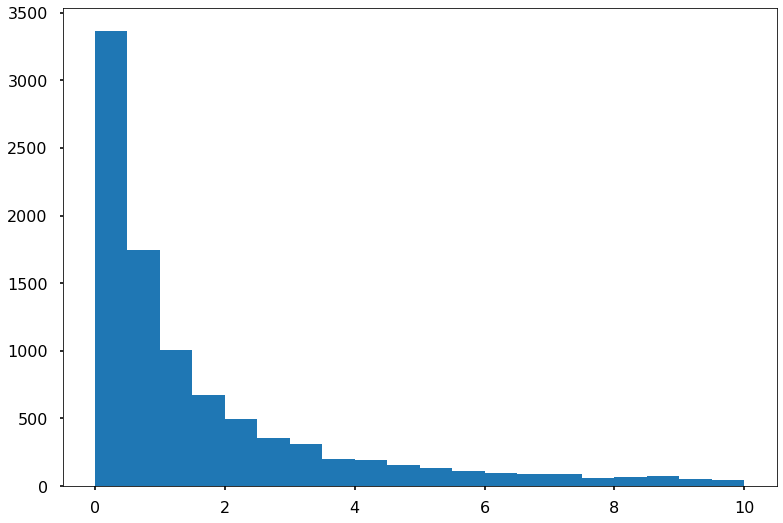

In [92]:
fig,ax = plt.subplots()
ax.hist(fitted_lognorm, range=(0,10), bins = 20)

plt.show()

In [64]:
df_NNDSS.loc[df_NNDSS.Report_delay<-10].count()

STATE                        194
CONFIRMATION_STATUS          194
POSTCODE                     190
TRUE_ONSET_DATE              194
SPECIMEN_DATE                193
NOTIFICATION_DATE            119
NOTIFICATION_RECEIVE_DATE    194
Diagnosis_Date               194
AGE_AT_ONSET                 194
SEX                          194
DIED                         130
PLACE_OF_ACQUISITION         194
HOSPITALISED                 184
CV_ICU                       135
CV_VENTILATED                132
OUTBREAK_REF                  51
CASE_FOUND_BY                171
CV_SYMPTOMS                  194
CV_OTHER_SYMPTOMS            133
CV_COMORBIDITIES             181
CV_OTHER_COMORBIDITIES        18
CV_GESTATION                   1
CV_CLOSE_CONTACT             194
Report_delay                 194
dtype: int64

In [ ]:
### LSHTM serial interval, see https://github.com/aakhmetz/COVID19SerialInterval
import seaborn as sns
fig,ax = plt.subplots(figsize=(12,9))
l = np.random.lognormal(1.376, 0.567, size=100000)
print("Serial Interval from LSHTM: \nMean: %f.2" %np.mean(l))
print("Std: %f.2" %np.sqrt(np.var(l)))

##compare to my own serial interval, where my SI = ts2 + tI2 - ts1,
#assuming person 1 infected at time tI1 = 0

ts1 = y #reuse previous distribution
ts2 = 1+np.random.gamma(2/1, 1, size = 10000) #resample symptoms
ti2 = x

SI = ts2 + ti2 - ts1

print("Serial Interval from model: \nMean: %f.2" %np.mean(SI))
print("Std: %f.2" %np.sqrt(np.var(SI)))

sns.kdeplot(l,cut=0,ax=ax, label='LSHTM', clip=(0,20),linewidth=5)
ax.hist(SI,bins=100, label='Model', density=True)
plt.legend()
plt.show()

Mean: 1.800000.2
Variance: 23.400000.2


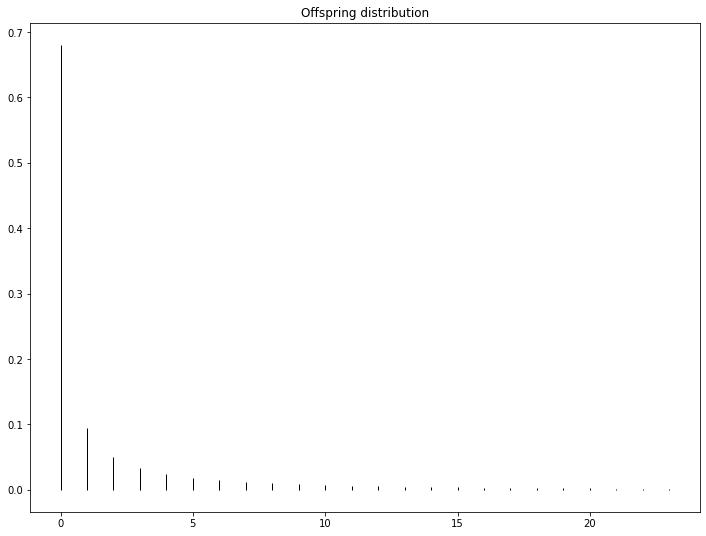

In [46]:
#Neg Binomial offspring distribution
import numpy as np
from scipy.stats import nbinom
Reff =1.8
k=0.15
p = 1-Reff/(Reff+k)
fig,ax = plt.subplots(figsize=(12,9))
rv = nbinom(k, p)
x = np.arange(nbinom.ppf(0.01, k, p),
          nbinom.ppf(0.99, k, p))
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
     label='frozen pmf')

print("Mean: %f.2" % nbinom.stats(k,p)[0])
print("Variance: %f.2" %nbinom.stats(k,p)[1])

ax.set_title("Offspring distribution")
plt.show()

# Python implementation

Using Cori et al. 2013, the posterior distribution of $R_{t,\tau}$ is a Gamma distribution with parameters shape and scale

\begin{equation}
\left( a + \sum^t_{s = t - \tau +1} I_s , \frac{1}{\frac{1}{b} + \sum^t_{ s = t-\tau + 1} \Lambda_s } \right)
\end{equation}


In [67]:
import numpy as np



def Reff_from_case(cases_by_infection, lamb, prior_a=1, prior_b=5, tau=7, samples=1000):
    """
    Using Cori at al. 2013, given case incidence by date of infection, and the force
    of infection \Lambda_t on day t, estimate the effective reproduction number at time
    t with smoothing parameter \tau.
    
    cases_by_infection: A T by N array, for T days and N samples 
    lamb : A T by N array, for T days and N samples
    """
    csum_incidence = np.cumsum(cases_by_infection, axis = 0)
    csum_lambda = np.cumsum(lamb, axis =0)
    
    roll_sum_incidence = csum_incidence[tau:, :] - csum_incidence[:-tau, :]
    roll_sum_lambda = csum_lambda[tau:,:] - csum_lambda[:-tau,:]
    a = prior_a + roll_sum_incidence
    b = 1/(1/prior_b + roll_sum_lambda)
    
    #Use array inputs to output to same size
    #inputs are T-tau by N, output will be T-tau by N
    return a,b, np.random.gamma(a,b) #shape, scale

def generate_summary(samples, dates_by='rows'):
    """
    Given an array of samples (T by N) where rows index the dates, 
    generate summary statistics and quantiles
    """
    
    if dates_by=='rows':
        #quantiles of the columns
        ax = 1
    else:
        #quantiles of the rows
        ax = 0
    mean = np.mean(samples, axis = ax)
    bottom, lower, median, upper, top = np.quantile(samples,
                                                     (0.05, 0.25, 0.5, 0.75, 0.95),
                                                     axis =ax)
    std = np.std(samples, axis = ax)
    output = {
        'mean':mean,
        'std':std,
        'bottom':bottom,
        'lower':lower,
        'median':median,
        'upper':upper,
        'top': top,
        
    }
    return output

def plot_Reff(Reff:dict, dates=None):
    """
    Given summary statistics of Reff as a dictionary, plot the distribution over time
    """
    import matplotlib.pyplot as plt
    
    plt.style.use('seaborn-poster')
    from datetime import datetime as dt
    
    fig, ax = plt.subplots(figsize=(12,9))
    
    if dates is None:
        dates = range(len(Reff['mean']))
        
    ax.plot(dates, Reff['mean'])
    
    ax.fill_between(dates, Reff['lower'],Reff['upper'], alpha=0.4, color = 'C0')
    ax.fill_between(dates, Reff['bottom'],Reff['top'], alpha=0.4, color= 'C0')
    
       #grid line at R_eff =1
    ax.set_yticks([1],minor=True,)
    #ax.set_yticks([0,2,3],minor=False)
    #ax.set_yticklabels([0,2,3],minor=False)
    ax.yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
    
    ax.tick_params(axis='x', rotation = 45)
    
    return fig, ax
    
        

In [49]:
#test of logic
import numpy as np
y = [1]*5 + [2]*3
y = np.array(y )
y = np.repeat(y[:,np.newaxis], 3, axis=1)
y[2,2] = -1

cy = np.cumsum(y, axis =0)

ry = cy[(3):, :] - cy[:-(3),:]

display(y)
display(cy)
display(ry)

array([[ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1, -1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 2,  2,  2],
       [ 2,  2,  2],
       [ 2,  2,  2]])

array([[ 1,  1,  1],
       [ 2,  2,  2],
       [ 3,  3,  1],
       [ 4,  4,  2],
       [ 5,  5,  3],
       [ 7,  7,  5],
       [ 9,  9,  7],
       [11, 11,  9]])

array([[3, 3, 1],
       [3, 3, 1],
       [4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

In [63]:
import numpy as np

test = np.random.normal(loc=1, scale = 2, size =(30,1000))

test_c = np.cumsum(test, axis=0)



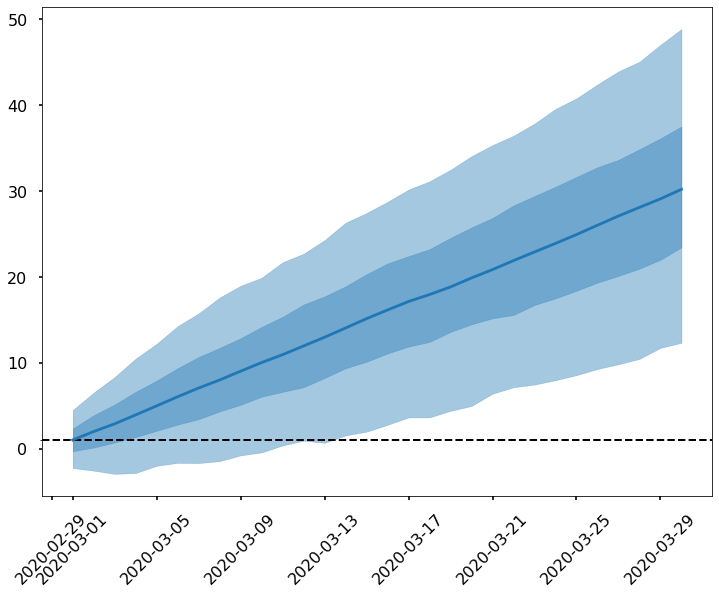

In [68]:
import pandas as pd

test_sum = generate_summary(test_c)

fig, ax = plot_Reff(test_sum, dates = pd.date_range(start='2020-03-01', periods=30))

plt.show()